# Necessary Information of dataset

Survival: Survival (0 = No; 1 = Yes)

Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name : Name

Sex : Sex

Age : Age

Sibsp : Number of Siblings/Spouses Aboard

Parch : Number of Parents/Children Aboard

Ticket : Ticket Number

Fare : Passenger Fare

Cabin : Cabin Number

Embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.shape[0]

891

In [5]:
train_df.isnull().sum() #this shows the total null values in a particular column.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

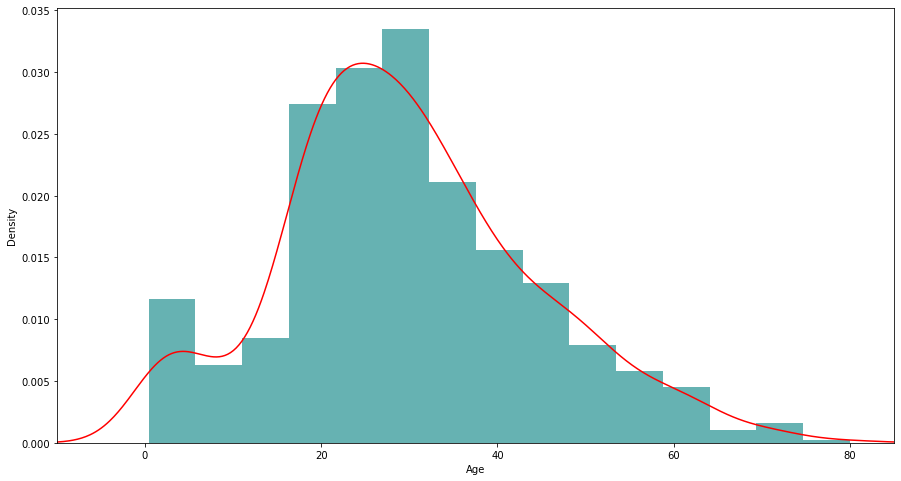

In [7]:
plt.figure(figsize=(15,8))
ax =train_df['Age'].hist(bins=15, density=True, stacked=True,color='teal',alpha=0.6)#alpha is the amount of transparency between 0 and 1
train_df['Age'].plot(kind="density", color='red')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show

In [8]:
train_df['Age'].mean()

29.69911764705882

In [9]:
train_df['Age'].median()

28.0

S    644
C    168
Q     77
Name: Embarked, dtype: int64


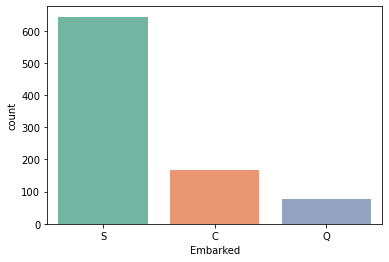

In [10]:
print(train_df['Embarked'].value_counts()) #embarked means the place from where took the ship.
sns.countplot(x='Embarked',data=train_df, palette='Set2')
plt.show()

<b> Refining dataset by removing null values with meadian of the data </b>

In [11]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)#this function is filing the null values with median.
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)                  

In [12]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


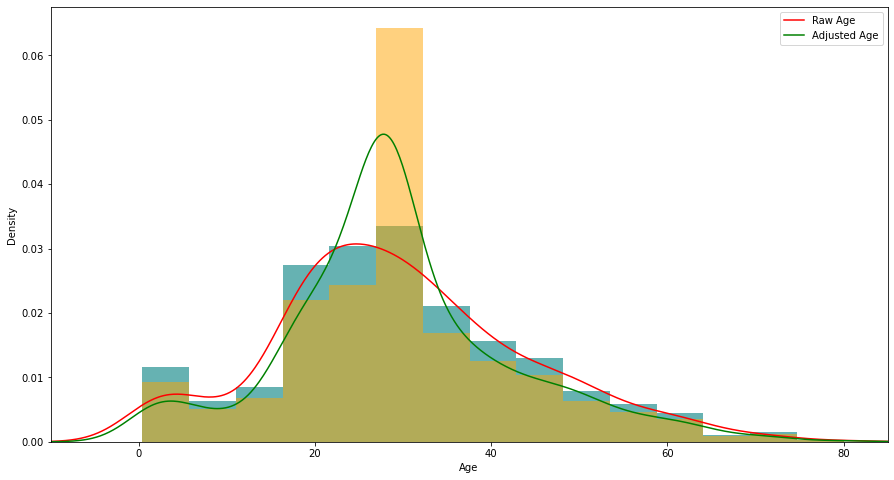

In [14]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='red')

ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='green')

ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [15]:
train_data.head()#just for checking i checked because inplace was creating a problem basically with inplace we only need to run the cell once if you will run cell again it will give you error then you need re-run the kernel or run the code from above.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
train_data['Travel Alone'] = np.where((train_data["SibSp"]+train_data["Parch"])>0,0,1)#basically in this cell where function is checking if the person is travelling with any siblings or parents
train_data.drop('SibSp',axis=1, inplace=True)                                        #then it will return true else false hence forming a column travel alone with true false values - (0,1)
train_data.drop('Parch',axis=1, inplace=True)

In [17]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Travel Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [18]:
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)
training.drop('Pclass_3', axis=1, inplace=True)#dropping this because if other 2 classes are 0 then it automatically indicates that Pclass_3 is 1 
training.drop('Embarked_C', axis=1, inplace=True)  #same reason above 

final_train = training
final_train.head()

,Survived,Age,Fare,Travel Alone,Pclass_1,Pclass_2,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,0,0
2,1,26.0,7.9250,1,0,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,1,0
4,0,35.0,8.0500,1,0,0,0,1,1


In [19]:
set(train_data['Pclass'])

{1, 2, 3}

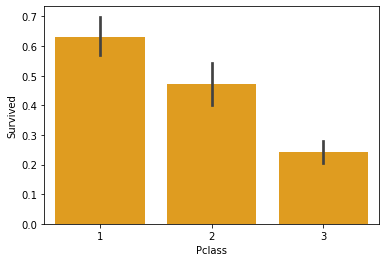

In [20]:
sns.barplot(x='Pclass',y='Survived', data=train_df, color='orange')
plt.show()

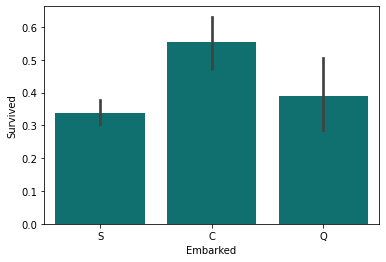

In [21]:
sns.barplot(x='Embarked',y='Survived',data=train_data, color='teal')
plt.show()

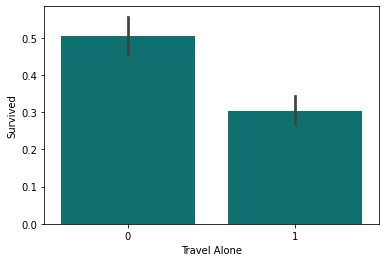

In [22]:
sns.barplot(x = 'Travel Alone',y = 'Survived',data=train_data, color='teal')
plt.show()

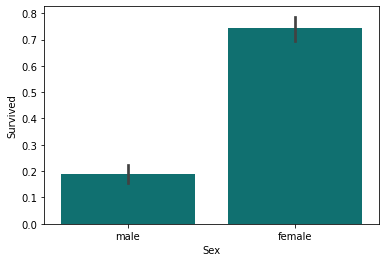

In [23]:
sns.barplot(x ='Sex',y ='Survived',data=train_data, color='teal')
plt.show()

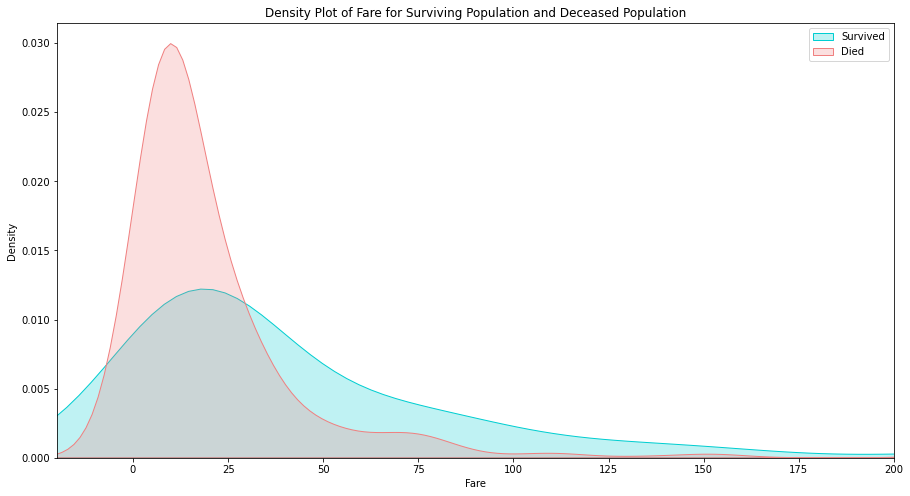

In [24]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

# Preprocessing for train/test/split

In [25]:
X = np.asarray(final_train[['Age', 'Fare', 'Travel Alone', 'Pclass_1', 'Pclass_2', 'Embarked_Q', 'Embarked_S','Sex_male']])
X[0:5]

array([[22.    ,  7.25  ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ,
         1.    ],
       [38.    , 71.2833,  0.    ,  1.    ,  0.    ,  0.    ,  0.    ,
         0.    ],
       [26.    ,  7.925 ,  1.    ,  0.    ,  0.    ,  0.    ,  1.    ,
         0.    ],
       [35.    , 53.1   ,  0.    ,  1.    ,  0.    ,  0.    ,  1.    ,
         0.    ],
       [35.    ,  8.05  ,  1.    ,  0.    ,  0.    ,  0.    ,  1.    ,
         1.    ]])

In [26]:
y = np.asarray(final_train[['Survived']]).ravel()
y[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [27]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.56573646, -0.50244517, -1.2316449 , -0.56568542, -0.51015154,
        -0.30756234,  0.61583843,  0.73769513],
       [ 0.66386103,  0.78684529, -1.2316449 ,  1.76776695, -0.51015154,
        -0.30756234, -1.62380254, -1.35557354],
       [-0.25833709, -0.48885426,  0.81192233, -0.56568542, -0.51015154,
        -0.30756234,  0.61583843, -1.35557354],
       [ 0.4333115 ,  0.42073024, -1.2316449 ,  1.76776695, -0.51015154,
        -0.30756234,  0.61583843, -1.35557354],
       [ 0.4333115 , -0.48633742,  0.81192233, -0.56568542, -0.51015154,
        -0.30756234,  0.61583843,  0.73769513]])

# train/test/split

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 8) (712,)
Test set: (179, 8) (179,)


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
model = LogisticRegression(solver='lbfgs').fit(X_train,y_train)
model

LogisticRegression()

In [30]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [39]:
print('ACCURACY :')

metrics.accuracy_score(y_pred,y_test)

ACCURACY :


0.8212290502793296

# K Nearest Neighbour (KNN)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

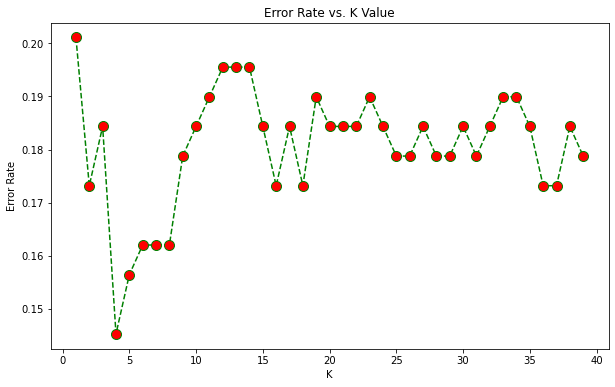

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

<b>k=4 is the best value for k here because of lowest error rate according to the graph </b>

In [35]:
model2 = KNeighborsClassifier(n_neighbors=4)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
print('CONFUSION_MATRIX :\n')
print(confusion_matrix(y_pred2,y_test))
print('\n')
print('REPORT :\n')
print(classification_report(y_pred2,y_test))

CONFUSION_MATRIX :

[[111  18]
 [  8  42]]


REPORT :

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       129
           1       0.70      0.84      0.76        50

    accuracy                           0.85       179
   macro avg       0.82      0.85      0.83       179
weighted avg       0.87      0.85      0.86       179



In [38]:
print('ACCURACY :')

metrics.accuracy_score(y_pred2,y_test)

ACCURACY :


0.8547486033519553

# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
classification = model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
y_pred3

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [43]:
print('CONFUSION_MATRIX :\n')
print(confusion_matrix(y_pred3,y_test))

CONFUSION_MATRIX :

[[106  16]
 [ 13  44]]


In [44]:
print('REPORT :\n')
print(classification_report(y_pred3,y_test))

REPORT :

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       122
           1       0.73      0.77      0.75        57

    accuracy                           0.84       179
   macro avg       0.81      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



In [45]:
print('ACCURACY :\n')
metrics.accuracy_score(y_pred3,y_test)

ACCURACY :



0.8379888268156425

# Support Vector Machine

In [46]:
from sklearn import svm
model4 = svm.SVC(kernel='rbf')
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)
y_pred4

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [47]:
print('CLASSIFICATION_REPORT :\n')
print(metrics.classification_report(y_pred4,y_test))

CLASSIFICATION_REPORT :

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       137
           1       0.62      0.88      0.73        42

    accuracy                           0.84       179
   macro avg       0.79      0.86      0.81       179
weighted avg       0.88      0.84      0.85       179



In [48]:
print('CONFUSION MATRIX :\n')
print(metrics.confusion_matrix(y_pred4,y_test))

CONFUSION MATRIX :

[[114  23]
 [  5  37]]


In [49]:
print('ACCURACY :\n')
print(metrics.accuracy_score(y_pred4,y_test))

ACCURACY :

0.8435754189944135


# Accuracy evaluation

In [50]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [62]:
y_pred = model.predict(X_test)
J1=jaccard_score(y_test,y_pred)

y_pred2 = model2.predict(X_test)
J2=jaccard_score(y_test,y_pred2)

y_pred3 = model3.predict(X_test)
J3=jaccard_score(y_test,y_pred3)

y_pred4 = model4.predict(X_test)
J4=jaccard_score(y_test,y_pred4)

list_js = [J1, J2, J3, J4]

In [66]:
LR_yhat_prob = model.predict_proba(X_test)

list_l1 = ['NA', 'NA', 'NA',(log_loss(y_test, LR_yhat_prob))]
list_l1

['NA', 'NA', 'NA', 0.4114155220176914]

In [63]:
# evaluate Logistic Regression
fs1 = (f1_score(y_test, y_pred,average='weighted'))
# evaluate KNN 
fs2 = (f1_score(y_test, y_pred2, average='weighted'))
# evaluate Decision tree
fs3 = (f1_score(y_test, y_pred3, average='weighted'))
# evaluate SVM
fs4 = (f1_score(y_test, y_pred4, average='weighted'))

list_fs = [fs1, fs2, fs3, fs4]
list_fs

[0.8187225550826419, 0.8510747227182619, 0.836920128790594, 0.8352725517581334]

In [67]:
df = pd.DataFrame( list_js,index=['Logistic Regression','KNN','Decision Tree','SVM'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_l1)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
Logistic Regression,0.561644,0.818723,NA
KNN,0.617647,0.851075,NA
Decision Tree,0.602740,0.836920,NA
SVM,0.569231,0.835273,0.411416


# KNN is the best model for Titanic dataset